##### 데이터 준비 

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np
import matplotlib.pyplot as plt
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2023-05-03 08:26:17--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-05-03 08:26:17--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-05-03 08:26:17--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
print(pca.components_.shape)

(50, 10000)


이 배열의 첫번째 차원은 지정한 주성분 개수,
두번째 차원은 항상 원본 데이터 특성 개수 

In [4]:
def draw_fruits(arr, ratio=1) :
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows) :
    for j in range(cols) :
      if i * 10 + j < n :
        axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
        axs[i,j].axis('off')
  plt.show()

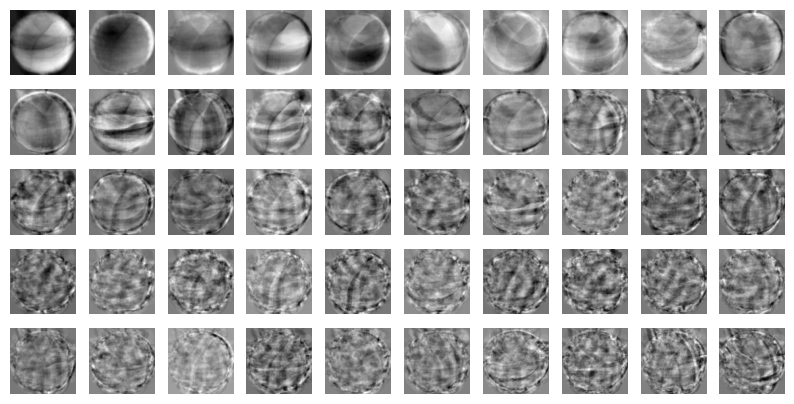

In [5]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나열한 것 

In [6]:
print(fruits_2d.shape)

(300, 10000)


10000개의 픽셀(특성)을 가진 300개의 이미지

In [7]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


50개 주성분으로, 50개 특성을 가진 데이터로 차원 축소 

In [8]:
# 복원
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


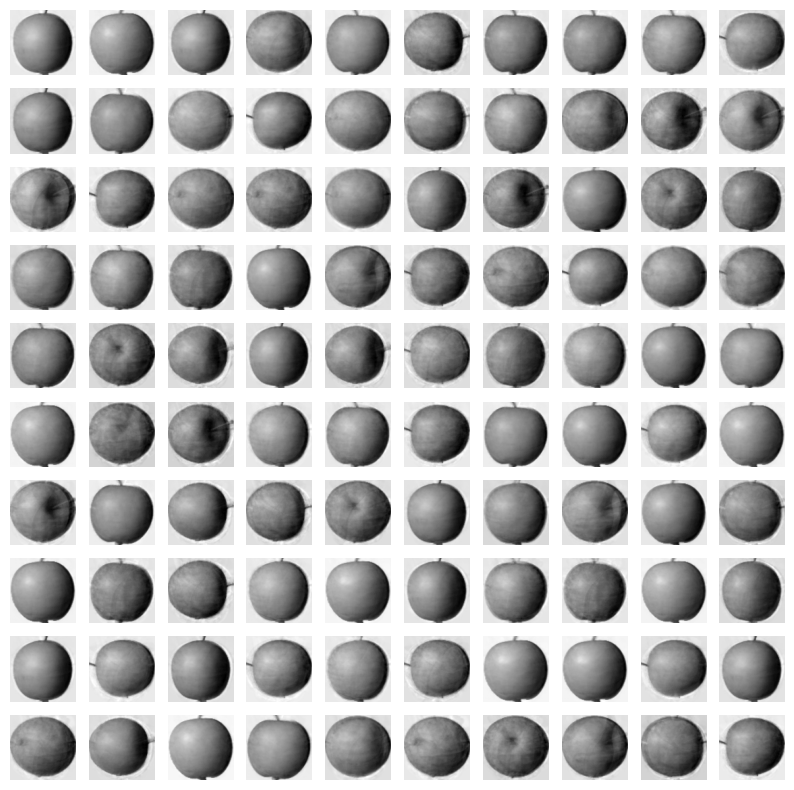

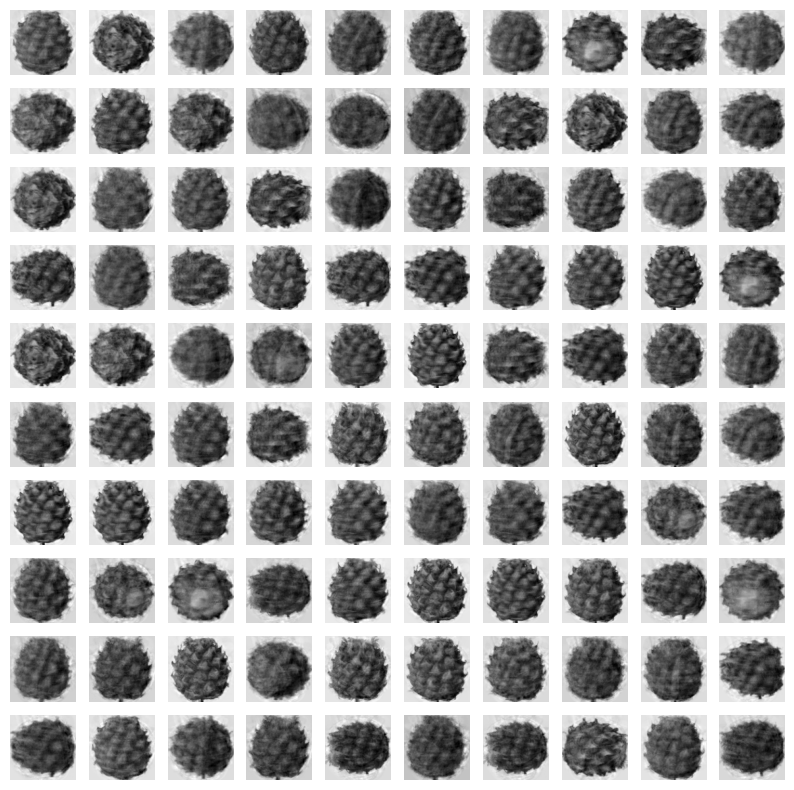

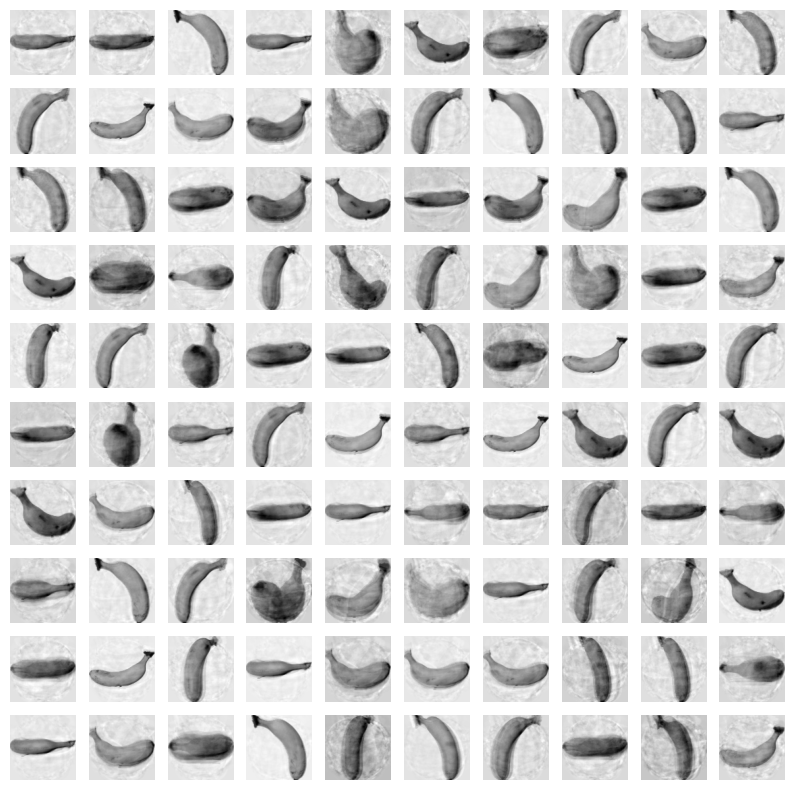

In [9]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200] :
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

In [10]:
print(np.sum(pca.explained_variance_ratio_))

0.9215564411722412


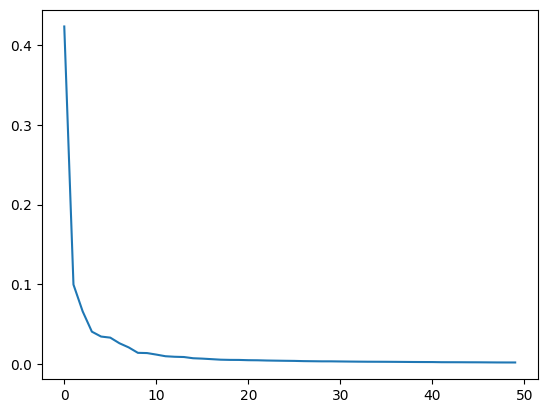

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

#### 지도학습 + 주성분 분석(비지도)

##### 로지스틱 회귀 

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [13]:
# 타깃 : 사과 0 / 파인애플 1 / 바나나 2
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [14]:
# 원본데이터
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
2.8363693714141847


In [15]:
# 차원 축소 데이터
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03428239822387695


정확도 늘어나고, 훈련시간 감소

In [16]:
# 설명된 분산 비율 지정
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [17]:
print(pca.n_components_)

2


단 2개의 특성만으로 원본 데이터 분산의 50%를 표현할 수 있다 !

In [18]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [19]:
fruits_pca

array([[-2778.41779459, -1571.87380954],
       [-3078.27365136, -2739.27040962],
       [-2620.61072939, -1486.87055253],
       [-3113.71771062, -2530.02283015],
       [-2520.64705144, -2330.64791173],
       [-1556.73860341,   123.05166122],
       [-2711.38755162, -1857.35297386],
       [-2884.74283654, -1836.15286362],
       [-2310.99240338, -2660.46264957],
       [-1521.26665012, -2445.37438374],
       [-2486.91643797, -1475.55043726],
       [-2800.83912843, -2001.07115818],
       [-2810.56248913, -2034.36322556],
       [-2209.09841637, -2303.76592225],
       [-2917.38810303, -2438.42530884],
       [-2198.1718942 ,  -636.80184589],
       [-2317.61818126, -2704.80151487],
       [-3289.84664277, -2436.3934378 ],
       [-2641.95018377,   503.74908687],
       [-3563.8760831 , -1290.01167006],
       [-3708.64597097, -1575.33617706],
       [-2423.96625858, -2080.63343889],
       [-3169.13983546, -2238.74224157],
       [-3059.33441459, -2250.14899831],
       [-2745.82

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03243942260742187


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

#### 비지도학습 + 주성분 분석(비지도)

##### K-means

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


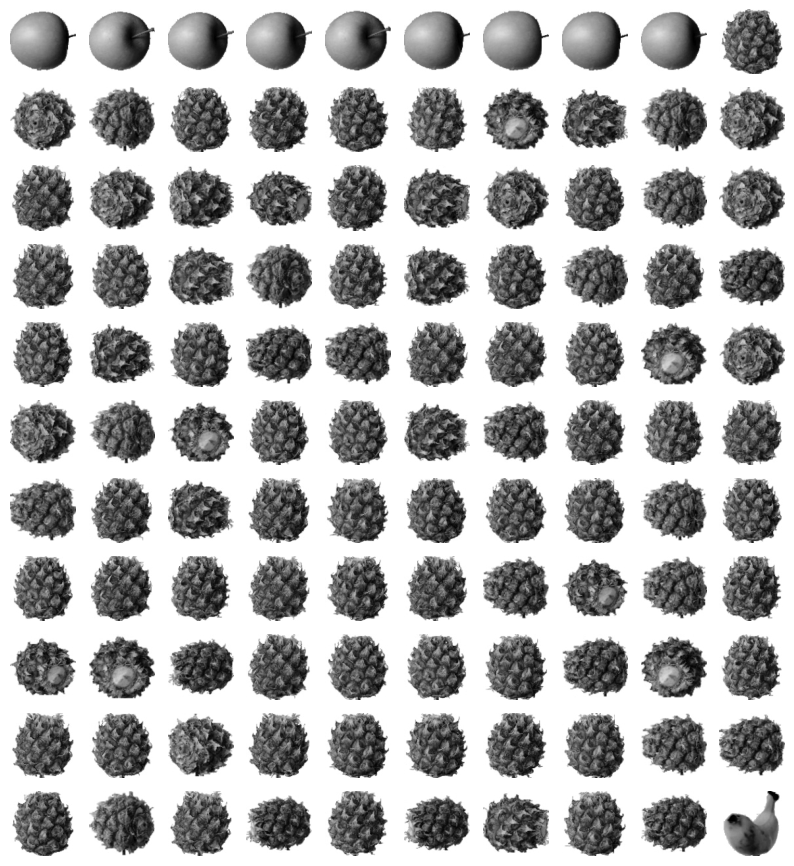

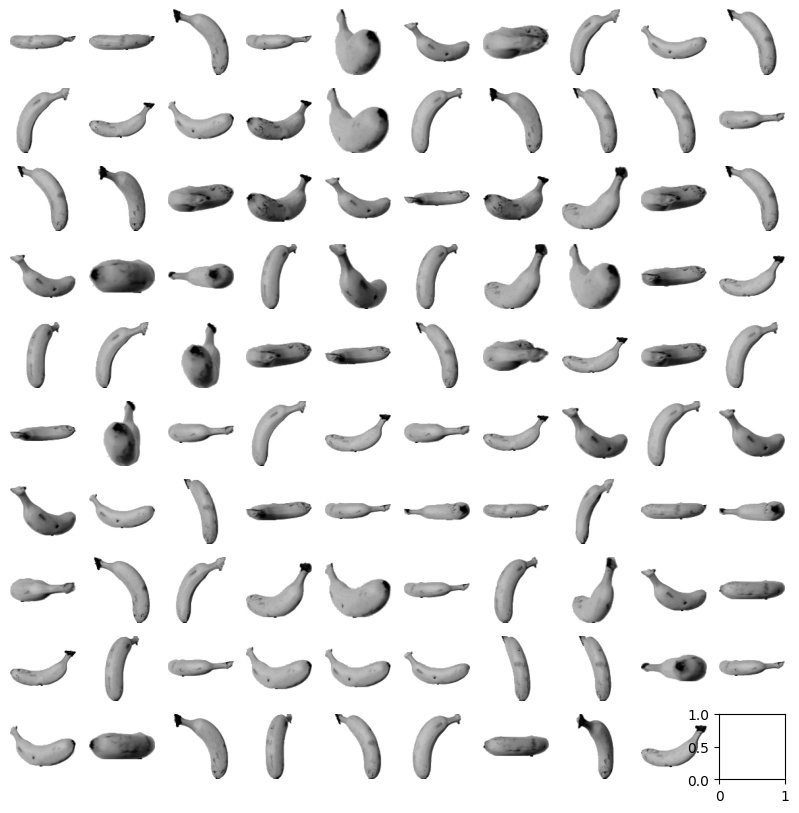

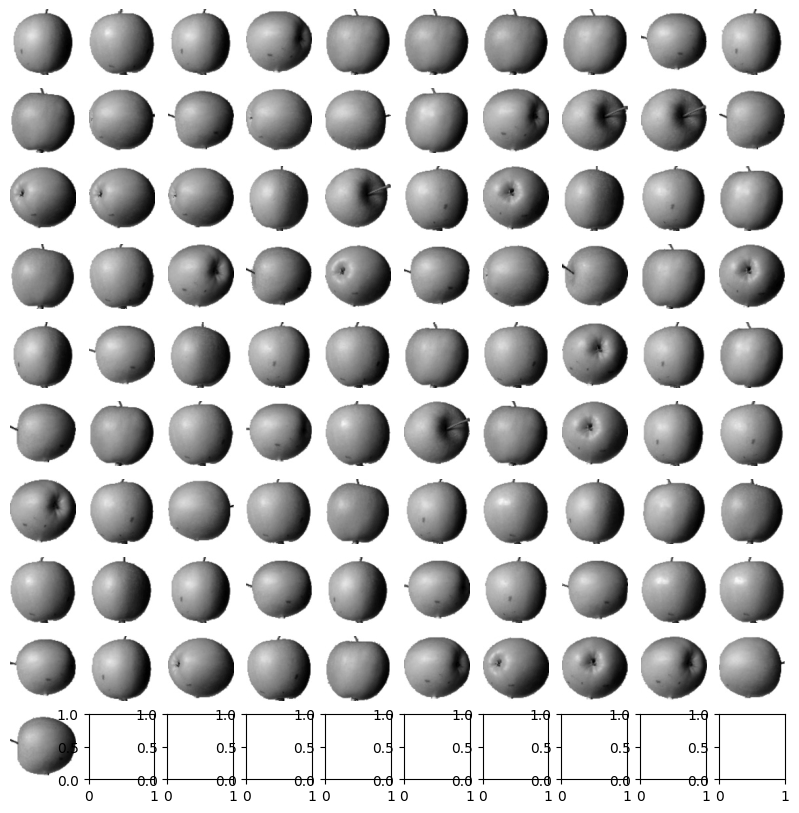

In [ ]:
for label in range(0, 3) :
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

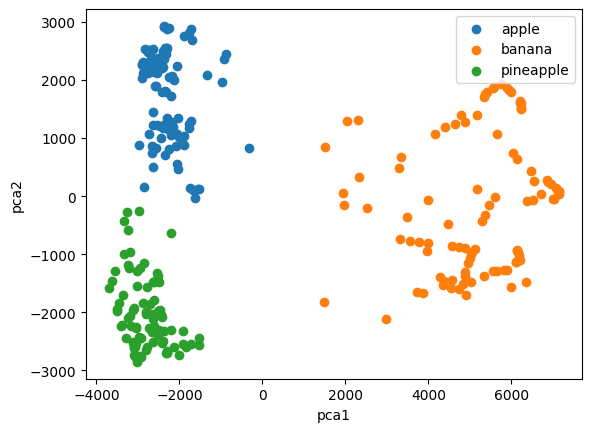

In [ ]:
# 시각화
for label in range(0, 3) :
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()